In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import glob
import os

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [154]:
citibike_data = pd.DataFrame()
for i in range(1,10):
    temp = pd.read_csv("../data/jc_citibike_data/2019/JC-2019{:02d}-citibike-tripdata.csv".format(i))
    citibike_data = citibike_data.append(temp)

citibike_data.sort_values(by=['starttime'])
citibike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [155]:
citibike_data['starthour'] = pd.to_datetime(citibike_data['starttime']).dt.strftime('%H:%M:%S')
citibike_data['endhour'] = pd.to_datetime(citibike_data['stoptime']).dt.strftime('%H:%M:%S')
citibike_data['date'] = pd.to_datetime(citibike_data['starttime']).dt.date

citibike_data['day'] = pd.to_datetime(citibike_data['starttime']).dt.strftime("%A")
# citibike_data['endDay'] = pd.to_datetime(citibike_data['stoptime']).dt.strftime("%A")

citibike_data['month'] = pd.to_datetime(citibike_data['starttime']).dt.month
# citibike_data['endMonth'] = pd.to_datetime(citibike_data['stoptime']).dt.month

daterange = citibike_data['date'].unique()

citibike_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starthour,endhour,date,day,month
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,03:09:09,03:12:30,2019-01-01,Tuesday,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,05:18:00,05:26:25,2019-01-01,Tuesday,1
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,10:36:33,10:49:10,2019-01-01,Tuesday,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,12:43:38,13:09:54,2019-01-01,Tuesday,1
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,12:43:39,13:09:46,2019-01-01,Tuesday,1


In [95]:
citibike_data['end station name'].unique()
path_docks = ['Journal Square', 'Grove St PATH','Columbus Dr at Exchange Pl', 'Newport PATH']

In [96]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
morning_rush = ['06:00','10:00']
evening_rush = ['16:00', '20:00']

In [97]:
cb_morning_rush = citibike_data[  (citibike_data['day'].isin(weekdays))
                                & (citibike_data['endhour']>= morning_rush[0]) 
                                & (citibike_data['endhour']<= morning_rush[1])
                                & (citibike_data['end station name'].isin(path_docks))
                               ]

cb_evening_rush = citibike_data[  (citibike_data['day'].isin(weekdays))
                                & (citibike_data['starthour']>= evening_rush[0]) 
                                & (citibike_data['starthour']<= evening_rush[1])
                                & (citibike_data['start station name'].isin(path_docks))
                               ]

192 193


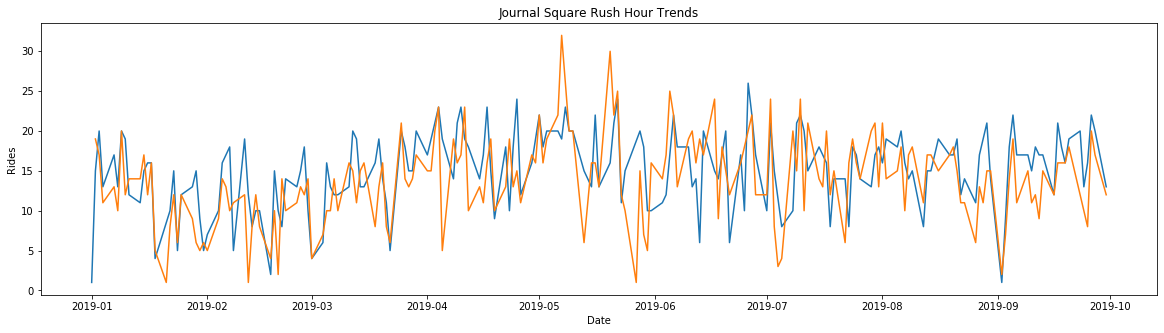

195 195


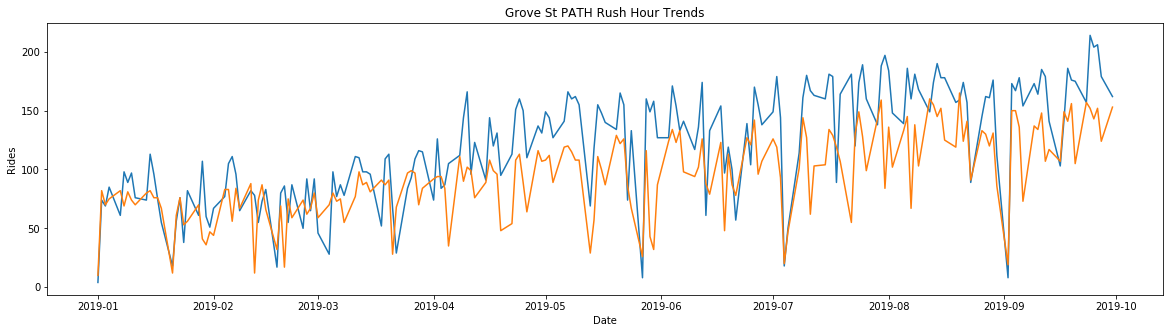

57 58


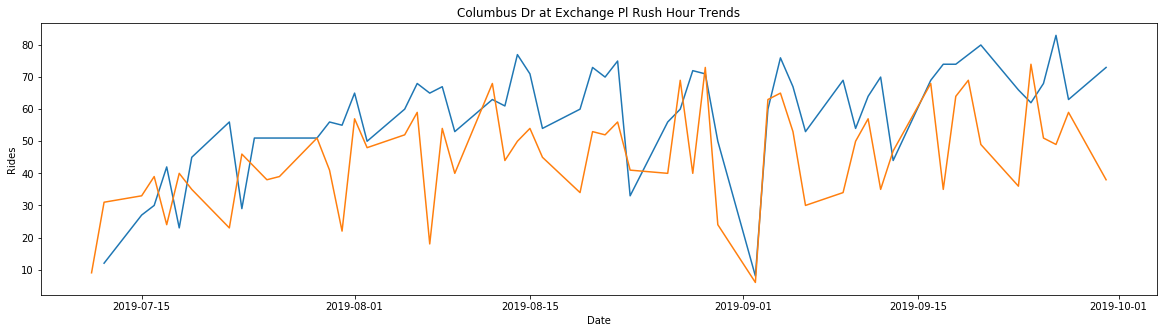

194 195


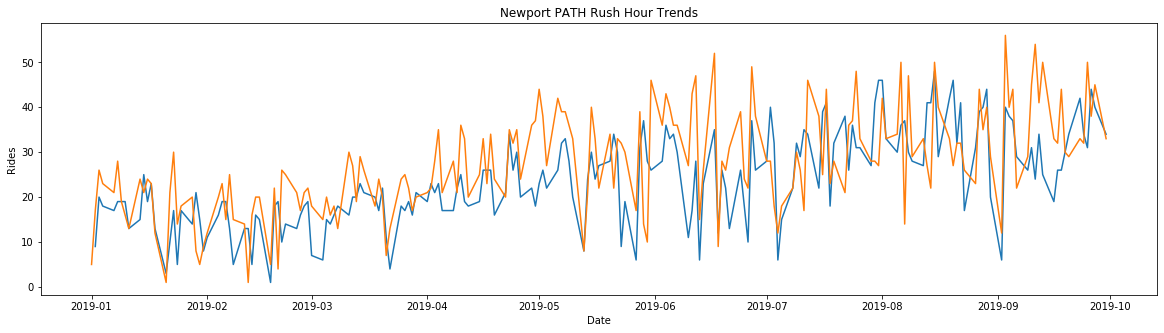

[['Journal Square', 15.223958333333334, 13.901554404145077], ['Grove St PATH', 121.38461538461539, 95.29230769230769], ['Columbus Dr at Exchange Pl', 58.01754385964912, 45.10344827586207], ['Newport PATH', 23.77319587628866, 27.42051282051282]]


[['Journal Square', 15.223958333333334, 13.901554404145077],
 ['Grove St PATH', 121.38461538461539, 95.29230769230769],
 ['Columbus Dr at Exchange Pl', 58.01754385964912, 45.10344827586207],
 ['Newport PATH', 23.77319587628866, 27.42051282051282]]

In [162]:
cb_morning_rush_counts = cb_morning_rush[['end station name','date','month']
                                        ].groupby(['end station name', 'date','month']).size().to_frame('num_trips').reset_index()

cb_evening_rush_counts = cb_evening_rush[['start station name','date','month']
                                        ].groupby(['start station name', 'date','month']).size().to_frame('num_trips').reset_index()

averages = []
for station in path_docks:
    temp = cb_morning_rush_counts[cb_morning_rush_counts['end station name'] == station]
    temp2= cb_evening_rush_counts[cb_evening_rush_counts['start station name'] == station]
    
    morn_avg = temp['num_trips'].mean()
    even_avg = temp2['num_trips'].mean()
    
    averages.append([station, morn_avg, even_avg])
    
    plt.figure(figsize=(20,5))
    plt.title("{} Rush Hour Trends".format(station))
    plt.xlabel('Date')
    plt.ylabel("Rides")   
    plt.plot(temp['date'],temp['num_trips'] )
    plt.plot(temp2['date'],temp2['num_trips'] )
    plt.show()

print(averages)
# [['Journal Square', 15.223958333333334, 13.901554404145077], 
#  ['Grove St PATH', 121.38461538461539, 95.29230769230769], 
#  ['Columbus Dr at Exchange Pl', 58.01754385964912, 45.10344827586207],
#  ['Newport PATH', 23.77319587628866, 27.42051282051282]]


In [164]:
decompositions = []
for station in path_docks: 
    res_morning  = sm.tsa.seasonal_decompose(
        cb_morning_rush_counts[cb_morning_rush_counts['end station name'] == station]['num_trips']
        ,model='additive', freq=12)
    
    res_evening = sm.tsa.seasonal_decompose(
        cb_evening_rush_counts[cb_evening_rush_counts['start station name'] == station]['num_trips']
        ,model='additive', freq=12)
    decompositions.append([station, res_morning, res_evening,])

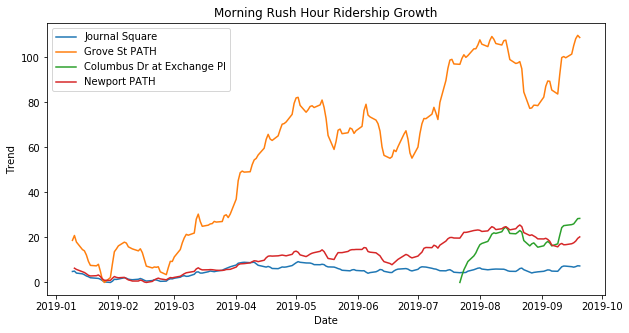

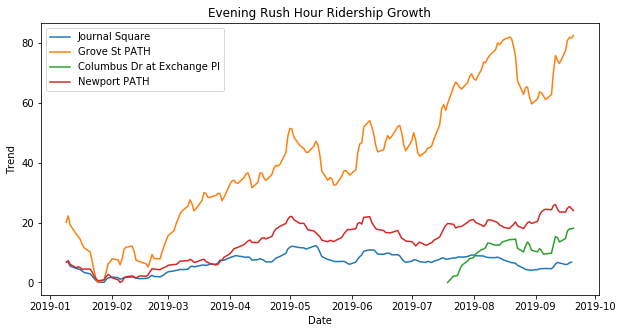

In [166]:
plt.figure(figsize=(10,5))
plt.title("Morning Rush Hour Ridership Growth".format())
plt.xlabel('Date')
plt.ylabel("Trend")  
for decomp in decompositions:
    station = decomp[0]
    morning = decomp[1]
    morning_rebased = morning.trend - morning.trend.min()
    temp = cb_morning_rush_counts[cb_morning_rush_counts['end station name'] == station]
    plt.plot(temp['date'], morning_rebased, label='{}'.format(station))
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
plt.title("Evening Rush Hour Ridership Growth".format())
plt.xlabel('Date')
plt.ylabel("Trend")  
for decomp in decompositions:
    station = decomp[0]
    evening = decomp[2]
    evening_rebased = evening.trend - evening.trend.min()
    
    temp= cb_evening_rush_counts[cb_evening_rush_counts['start station name'] == station]
    plt.plot(temp['date'], evening_rebased, label='{}'.format(station))
plt.legend(loc='upper left')
plt.show()